<a href="https://colab.research.google.com/github/nowhyun/Study/blob/master/A_Data_Science_Framework_To_Achieve_99_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####*해당 문서는 https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy 의 글을 번역한 것으로,*
#####*파이썬을 활용한 데이터 사이언스의 핵심 요소들을 정리하기 위해 작성하였으며, 오역 및 의역, 필요없다고 판단되는 문장의 제거 등이 있습니다.*  
#####*작성자: [이재현](https://github.com/nowhyun)*
#####*일자: 2020년 03월 02일*
#####*하단 코드는 파이썬 3.x 및 구글 Colab에서 작성되었습니다.*
---



# __데이터 사이언스의 뼈대: 정확도 99%를 위하여__
> 데이터 사이언스를 위한 커뮤니티, 캐글에 오신 모든 분들! 반갑습니다. 이 분야를 공부하는 대부분의 초심자들은, 자신이 이해할 수 없는 다양한 라이브러리와 알고리즘을 접하게 되면서 결국 자신의 길을 잃어버립니다. 이 글은 데이터 사이언스의 뼈대를 하나하나 짚어나감으로써, 데이터 사이언티스트로써의 사고방식을 설명함과 동시에, 그대를이 생각하는 바와 코드를 일대일로 비교함으로써 남들보다 더 탄탄한 기반을 다질 수 있게할 것입니다. 예제로써 사용된 문제는 캐글의 ['Titanic: Machine Learning from Disaster'](https://www.kaggle.com/c/titanic)'입니다. 마지막으로 부탁드리고 싶은 것은, 데이터 사이언스는 아직까지가 역사가 깊지 않은, 하루하루 발전하고 있는 분야입니다. 항상 최근의 동향을 살피고, 개개인이 코드를 개선해나갈 수 있으면 좋겠습니다.

# __목차__


1.   Chpater 1. 데이터 사이언티스트가 오즈(Odds)를 극복하는 방법
2.   Chpater 2. 데이터 사이언스의 뼈대
3.   Chpater 3. Step 1: 문제 정의
4.   Chpater 4. Step 2: 데이터 수집
5.   Chpater 5. Step 3: 데이터 준비
6.   Chpater 6. 데이터 정제의 4개념: 수정, 완성, 생성, 변환
7.   Chpater 7. Step 4: 통계를 활용한 탐색적 분석(Exploratory Analysis)
8.   Chpater 8. Step 5: 데이터 모델링
9.   Chpater 9. 모델의 적정성 평가
10.  Chpater 10. 하이퍼 파리미터 조정을 통한 모델 튜닝
11.  Chpater 11. 특성 선택(Feature Selection)을 통한 모델 튜닝
12.  Chpater 11. Step 6: 데이터 모델 검증 및 구현
13.  Chpater 12. 결론
14.  Chpater 13. Step 7: 최적화와 전략 수립
15.  Chpater 14. Change Log
16.  Chpater 15. Credits

######__저자__: 해당 내용들은 단순히 이 문제(Titanic)을 풀기위함이 아니라, 데이터 사이언스 과정 그 자체를 습득하는데 의의가 있습니다. 항상 print() 함수를 사용하여 코드의 내용을 이해해나가야 하며, 반드시 구글과 친해져야합니다. 당신이 모르는 것에 대한 내용은 99.99% 다른 누군가가 이미 구글에 질문하고, 해결했기 때문입니다.



# __Chapter 1. 데이터 사이언티스트가 오즈(Odds)를 극복하는 방법__


# __Chapter 2. 데이터 사이언스의 뼈대__
1. __문제 정의__: 만약 데이터 사이언스, 빅데이터, 머신러닝, 예측 분석, 비즈니스 인텔리전스 또는 다른 유행어가 **진정한 해결책** 이라면, 문제될 것이 무엇이겠습니까? 이러한 유행어는 단순히 어떤 **기술**일 뿐입니다. 우리는 너무나 자주 이러한 **기술** 에 집착하지만, 본질은 문제 - 요구사항 - 해결책 - 디자인 - 기술 순으로 뼈대를 잡아나가는 것입니다.
2. __데이터 수집__: 지식의 홍수라고 표현할 정도로 현 시대에는 엄청난 량의 데이터가 쏟아지고 있으며, 이러한 데이터는 분명 어딘가에 축적되고 있습니다. 'You don't have to reinvent the wheel, you just have to know where to find it' 라는 속담처럼, 우리는 이미 존재하는 그 데이터셋을 잘 정제해서 쓰는 것이 더욱 중요합니다.
3. __데이터 준비__: 이는 wild data를 manageable data로 변환하는 과정으로, 때때로 data wrangling이라고도 불립니다. 해당 과정은 데이터 저장 및 처리를 위한 데이터 아키텍처 구현, 데이터 추출 및 이상치, 결측치를 처리하는 데이터 정제 등을 포함합니다.
4. __탐색적 분석(Exploratory Analysis)__: 데이터를 다뤄보신 분들은 누구나 garbage-in, garbage-out을 알고 계실 것입니다. 따라서, 본격적인 모델을 구성하기전, 데이터셋에서 잠재적인 문제점과 패턴, 분류, 상관관계 및 비교를 한 눈에 파악하기 위한 기술적 통계와 그래픽 통계를 탐색하는 과정은 중요합니다. 또한 데이터가 질적(Qualitative, Categorical)인지, 양적(Quantitative, Numerical)인지 파악하는 것 역시 올바른 가설 검정 및 데이터 모델 선택에 있어 중요한 요소입니다.
5. __데이터 모델링__: 서술적 또는 추론적 통계와 마찬가지로, 데이터 모델링은 데이터를 요약하거나 미래의 결과를 예측할 수 있습니다. 당신이 보유한 데이터셋과 예상되는 결과에 따라 사용 가능한 알고리즘이 결정될 것이며, 기억해야할 것은 알고리즘은 마법의 지팡이가 아닌 단순한 도구일 뿐이라는 것입니다. 무수히 많은 도구(알고리즘) 중 자신이 해야할 일에 가장 적절한 것을 선택할 줄 알고, 또 다룰줄 아는 것은 굉장히 중요한 포인트입니다.
6. __데이터 모델 검증 및 구현__: 당신의 데이터의 서브셋을 기반으로 모델을 훈련시킨 뒤, 모델을 테스트하십시오. 이런 과정을 통해, 우리는 과대적합 및 과소적합을 해결할 방향성을 찾아나갈 수 있습니다.
7. __최적화와 전략 수립__: 데이터 사이언티스트들은 대개 어플리케이션의 운영 등은 다른 전문가에게 맡기기 때문에 모델 그 자체의 설계에 집중할 시간이 더 많습니다. 이 단계에서 당신은 당신의 코드를 계속해서 더 빠르고, 더 정확하고, 더 명확하게 개선해나가야합니다.


#__Chpater 3. Step 1: 문제 정의__
프로젝트 요약: 
-   총원 2224명 중 1502명이 사망한 역사적인 비극인 타이타닉호 난파 사건에 대한 데이터셋을 통해, 어떤 종류의 사람들이 생존 가능성이 있었는지에 대한 분석을 시행한다.

필요 스킬: 
-  이항 분류
-  파이썬 또는 R

#__Chpater 4. Step 2: 데이터 수집__
['Titanic: Machine Learning from Disaster'](https://www.kaggle.com/c/titanic) 을 참고합니다.

#__Chpater 5. Step 3: 데이터 준비__
앞서 말했듯, 데이터 준비 과정에서는 데이터를 구조화하고, 추출 및 정제하는 내용이 포함되나, Step 2: 데이터 수집에서 알 수 있듯 이번 경우에는 준비된 데이터를 공급받았기 때문에, 데이터 정제만을 다루도록 하겠습니다.

### __5.1 라이브러리 가져오기__
데이터 준비 과정에서 가장 기본적인 라이브러리를 임포트합니다

In [2]:
#구글 드라이브 연결
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
#@title 현재 경로명 입력
#@markdown /My Drive/ [ Insert text here ]
Directory = "Bigai/Kaggle" #@param {type:"string"}

currDir = '/content/gdrive/My Drive/' + Directory
#현재 코드가 실행되는 디렉토리명
print("현재 경로:", currDir)

현재 경로: /content/gdrive/My Drive/Bigai/Kaggle


In [4]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib as mpl #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(mpl.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#기타 라이브러리
import os
import random
import time

#경고 에러 무시
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

#현재 경로/input 내에 있는 데이터 확인
from subprocess import check_output
try:  
    print(check_output(["ls", currDir + "/input"]).decode("utf8"))
except:
    print('경로를 재확인하십시오.')

Python version: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
pandas version: 0.25.3
matplotlib version: 3.1.3
NumPy version: 1.17.5
SciPy version: 1.4.1
IPython version: 5.5.0
scikit-learn version: 0.22.1
-------------------------
gender_submission.csv
test.csv
train.csv



### __5.11 데이터 모델링 라이브러리 가져오기__
우리는 인기있는 기계 학습 라이브러리인 scikit-learn을 활용할 것입니다. sklearn에서 알고리즘은 Estimatior라고 불리며, 그들 자신의 클래스에서 구현됩니다. 또한 데이터 시각화를 위하여, 우리는 matplotlib과 seaborn 라이브러리를 사용할 것입니다.

In [0]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

###__5.2 데이터 둘러보기__
앞서 말했듯 우리는 무턱대고 기술을 적용하는 것이 아닌, 문제 - 요구사항 - 해결책 - 디자인 - 기술 단계를 밟아나가야합니다. 데이터를 받았다면, 우선적으로 데이터가 어떻게 구성되었는지, 예를 들어 데이터 타입, 값의 크기, 독립/특성 변수, 의존/목표 변수 등을 파악해야합니다.<br>
이를 위하여, 먼저 데이터셋을 가져오고 info(), sample() 함수를 통해 전반적인 시야를 틔워야합니다.

1.   Survival : 생존유무(0: 사망, 1: 생존), Target(=Outcome=Dependent) 변수
2.   PassengerId : 탑승객의 고유 아이디, 이는 Target 변수에 영향을 미치지 않는 고유 식별자로 가정하여 분석에서 제외한다.
3.   Pclass : 객실의 등급(1: 상위, 2: 중간, 3: 하위), 사회 경제적 지위의 지표가 될 수 있다.
4.   Name : 이름, Mr, Dr 등에서 성별, 직업, 가족 구성원의 크기, 사회 경제적 지위 등을 도출할 수 있다.
5.   Sex : 성별, 이산 데이터타입
6.   Age : 나이, 연속 데이터타입
7.   Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
8.   Parch: 함께 탑승한 부모, 자식의 수, Sibsp와 함께 Family라는 새로운 변수를 만들 수 있다.
9.   Ticket: 티켓번호, 이는 Target 변수에 영향을 미치지 않는 고유 식별자로 가정하여 분석에서 제외한다.
10.  Fare: 티켓의 요금, 연속 데이터 타입
11.   Cabin: 객실번호, 사고 발생시의 대략적 위치를 알 수 있는 데이터이나, 결측치가 많기 때문에 분석에서 제외한다.
12.   Embarked: 배에 탑승한 위치(C: Cherbourg, Q: Queenstown, S: Southampton), 이산 데이터타입

In [6]:
#dataset은 3개로 분류될 것입니다: train set/ valid set/ test set

#train set, 추후 train set과 valid set으로 분할
data_train_origin = pd.read_csv(currDir + '/input/train.csv')

#test set, 모델 제출 전 검증용으로 사용
data_test  = pd.read_csv(currDir + '/input/test.csv')

#깊은 복사 후 데이터 사용
data_train = data_train_origin.copy(deep = True)

#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data_train, data_test]

#dataset preview
print (data_train_origin.info()) 
#data_raw.head() 
#data_raw.tail()
data_train_origin.sample(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.00,0,0,PC 17485,56.9292,E36,C
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.00,0,0,312992,7.7750,NaN,S
713,714,0,3,"Larsson, Mr. August Viktor",male,29.00,0,0,7545,9.4833,NaN,S
372,373,0,3,"Beavan, Mr. William Thomas",male,19.00,0,0,323951,8.0500,NaN,S
890,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.7500,NaN,Q
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.00,1,1,11751,52.5542,D35,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.00,0,1,392096,12.4750,E121,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
661,662,0,3,"Badt, Mr. Mohamed",male,40.00,0,0,2623,7.2250,NaN,C


# __Chpater 6. 데이터 정제의 4개념: 수정, 완성, 생성, 변환__
이번 단원에서는, 우리의 데이터를 4개 개념으로 정제할 것입니다. 1) 이상치의 수정, 2) 결측치 완성, 3) 분석을 위한 새로운 특성의 생성, 4) 계산을 위한 올바른 포맷으로의 변환
1. __수정__: 데이터를 둘러보면, Age와 Fare에서 약간의 특이값들이 눈에 띄는 것을 알 수 있습니다. 예를 들어, 800세의 경우 아마 80세일 것일 것이라 생각하고 수정할 수 있습니다. 그러나 이러한 데이터들을 사용할지 말지를, 우리는 탐색적 분석을 완료한 뒤에 결정할 것입니다.
2. __완성__: Age, Cabin, Embarked 컬럼에서 결측치가 있습니다. 추후 모델 구축 과정에서 몇몇 알고리즘은 결측치를 다룰 수 있습니다만(예: 의사 결정 나무), 나머지의 경우는 그럴 수 없습니다. 저희는 여러 모델을 비교할 예정이기 때문에 결측치를 2가지 방법으로 처리하도록 하겠습니다. 첫째는 레코드를 삭제하는 것이며, 둘째는 적절한 값으로 대치하는 것입니다. 
그러나 실제로는 데이터의 대부분이 결측치가 아닌 이상 단순 삭제 방법론은 권장하지 않습니다. 기본적인 대치 방법은 질적 데이터의 경우 mode를, 양적 데이터의 경우 평균(+무작위 표준편차), 중간값을 사용하는 것입니다. 이 데이터셋에서 Age는 중간값, Cabin은 제거, Embarked는 mode(최빈값)를 사용할 것입니다. 이를 통해 일차적인 모델을 구축한 뒤 추후 대치값을 수정하여 정확도가 향상되는지를 파악한 후 개선할 수 있습니다.
3. __생성__: 특성 공학(Feature Engineering)이란 기존 특성을 이용하여 결과에 영향을 미치는 새로운 특성을 생성하는 것입닏. 이 데이터셋의 경우, 해당 특성이 Survival에 영향을 미쳤는지 여부를 결정하기 위한 Title 특성을 생설할 것입니다.
4. __변환__: 마지막으로 우리는 Format을 다룰 것입니다. 우리의 Categorical data는 object dtype으로 존재하는 상태인데 이 경우 수학적 계산을 어렵게합니다. 때문에 저희는 이들을 Categorical dummy variable로써 변환할 것입니다.

In [7]:
print('Train columns with null values:\n', data_train.isnull().sum())
print("-"*10)

print('Test columns with null values:\n', data_test.isnull().sum())
print("-"*10)

data_train_origin.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### __6.1 데이터 클리닝__
__관련 문서__
*   [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)
*   [pandas.DataFrame.info](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html)
*   [pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)
*   [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html)
*   [pandas.isnull](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html)
*   [pandas.DataFrame.sum](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html)
*   [pandas.DataFrame.mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html)
*   [pandas.DataFrame.copy](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.copy.html)
*   [pandas.DataFrame.fillna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)
*   [pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)
*   [pandas.Series.value_count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)
*   [pandas.DataFrame.loc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)


In [8]:
###완성: data_train, data_test 내의 Age, Fare는 median, Embarked는 mode로 값을 대치한다.
for dataset in data_cleaner:    
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

#PassengerId, Cabin, Ticket 열 삭제
drop_column = ['PassengerId','Cabin', 'Ticket']
data_train.drop(drop_column, axis=1, inplace = True)

print(data_train.isnull().sum())
print("-"*10)
print(data_test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [9]:
###생성: 특성 공학, 새로운 특성을 생성
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    #dataset['Name]의 원소는 blah,Title.blah 로 구성
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

    
#cleanup rare title names
print(data_train['Title'].value_counts())
print("-"*10)

stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (data_train['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
#Misc: 기타
data_train['Title'] = data_train['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data_train['Title'].value_counts())
print("-"*10)

#preview data again
data_train.info()
data_test.info()
data_train.sample(10)

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Don               1
Mme               1
Lady              1
Ms                1
the Countess      1
Capt              1
Sir               1
Jonkheer          1
Name: Title, dtype: int64
----------
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
48,0,3,"Samaan, Mr. Youssef",male,28.0,2,0,21.6792,C,3,0,Mr,"(14.454, 31.0]","(16.0, 32.0]"
201,0,3,"Sage, Mr. Frederick",male,28.0,8,2,69.5500,S,11,0,Mr,"(31.0, 512.329]","(16.0, 32.0]"
246,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,7.7750,S,1,1,Miss,"(-0.001, 7.91]","(16.0, 32.0]"
279,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,20.2500,S,3,0,Mrs,"(14.454, 31.0]","(32.0, 48.0]"
159,0,3,"Sage, Master. Thomas Henry",male,28.0,8,2,69.5500,S,11,0,Master,"(31.0, 512.329]","(16.0, 32.0]"
404,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,8.6625,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
41,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,21.0000,S,2,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
485,0,3,"Lefebre, Miss. Jeannie",female,28.0,3,1,25.4667,S,5,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
802,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,120.0000,S,4,0,Master,"(31.0, 512.329]","(-0.08, 16.0]"
194,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,27.7208,C,1,1,Mrs,"(14.454, 31.0]","(32.0, 48.0]"


### __6.2 포맷 변환__
앞서 말했듯이, 우리는 수학적 계산을 용이하게 하기 위하여 Categorical data를 dummy variable로 변환할 것입니다. 이를 위해서는 여러가지 방법이 있는데, 그 중 저희는 sklearn과 pandas의 함수를 활용할 것입니다.
__관련 문서__
*  [Categorical Encoding](https://pbpython.com/categorical-encoding.html)
*  [Sklearn LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
*  [Sklearn OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
*  [Pandas Categorical dtype](https://pandas.pydata.org/pandas-docs/stable/categorical.html)
*  [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

In [10]:
###변환: Categorical data를 sklearn 내부 LabelEncoder를 사용하여 np.int로 변환 

#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data_train_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data_train_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data_train_xy =  Target + data_train_x
print('Original X Y: ', data_train_xy, '\n')

#define x variables for original w/bin features to remove continuous variables
data_train_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data_train_xy_bin = Target + data_train_x_bin
print('Bin X Y: ', data_train_xy_bin, '\n')

#define x and y variables for dummy features original
data_train_dummy = pd.get_dummies(data_train[data_train_x]) #OneHotEncoder
data_train_x_dummy = data_train_dummy.columns.tolist() #컬럼명으로 구성된 리스트
data_train_xy_dummy = Target + data_train_x_dummy
print('Dummy X Y: ', data_train_xy_dummy, '\n')


data_train_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


### __6.21 정제된 데이터 점검__
데이터를 정제해나가면서 상태를 체크하는 것은 항상 중요합니다.

In [11]:
print('Train columns with null values: \n', data_train.isnull().sum())
print("-"*10)
print(data_train.info())
print("-"*10)

print('Test columns with null values: \n', data_test.isnull().sum())
print("-"*10)
print(data_test.info())
print("-"*10)

data_train_origin.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null catego

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### __6.22 Train 및 Test data 분할__
앞서 언급했듯이, 제공된 테스트 파일은 실제 제출을 위한 테스트 데이터입니다. 때문에 저희는 data_train을 sklearn의 train_test_split 함수를 사용하여 train(75%) / validation(25%)로 분할하여 사용하도록 하겠습니다. 이러한 분할 과정에서 중요한 점은, train data의 일부가 test data로 들어가게 되어 이른바 치팅이 되지 않게끔하는 것입니다. 또한 모델이 해당 train data에 overfit되지 않도록 적절한 옵션을 선택하는 것이 중요합니다.


In [12]:
#split train and valid data with function defaults
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(data_train[data_train_x_calc], data_train[Target], random_state = 0)
train_x_bin, valid_x_bin, train_y_bin, valid_y_bin = model_selection.train_test_split(data_train[data_train_x_bin], data_train[Target] , random_state = 0)
train_x_dummy, valid_x_dummy, train_y_dummy, valid_y_dummy = model_selection.train_test_split(data_train_dummy[data_train_x_dummy], data_train[Target], random_state = 0)


print("Data_train Shape: {}".format(data_train.shape))
print("Train_x Shape: {}".format(train_x.shape))
print("Valid_x Shape: {}".format(valid_x.shape))

train_x_bin.head()

Data_train Shape: (891, 19)
Train_x Shape: (668, 8)
Valid_x Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


# __Chpater 7. Step 4: 통계를 활용한 탐색적 분석(Exploratory Analysis)__
이제 우리의 데이터가 잘 정제되었기 때문에, 지금부터는 데이터를 설명하고 요약하기 위해 기술적이고, 그래픽적인 통계를 활용할 것입니다. 이 단계에서 당신은 여러 특성을 분류하고, Target variable과 다른 특성들 사이의 상관관계를 결정할 것입니다.

In [13]:
#Suvival과 이산변수간의 상관관계 분석
#pandas내 groupby 함수를 사용하여 pivot table 만들기
for col_name in data_train_x:
    if data_train[col_name].dtype != 'float64' :
        print('Survival Correlation by:', col_name)
        #해당 col의 어떤 카테고리값에 속했을시 평균 생존률을 계산
        print(data_train[[col_name, Target[0]]].groupby(col_name, as_index=False).mean())
        print('-'*10, '\n')
        

#pd.crosstab, 빈도표 만들기 함수
print(pd.crosstab(data_train['Title'],data_train[Target[0]]))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

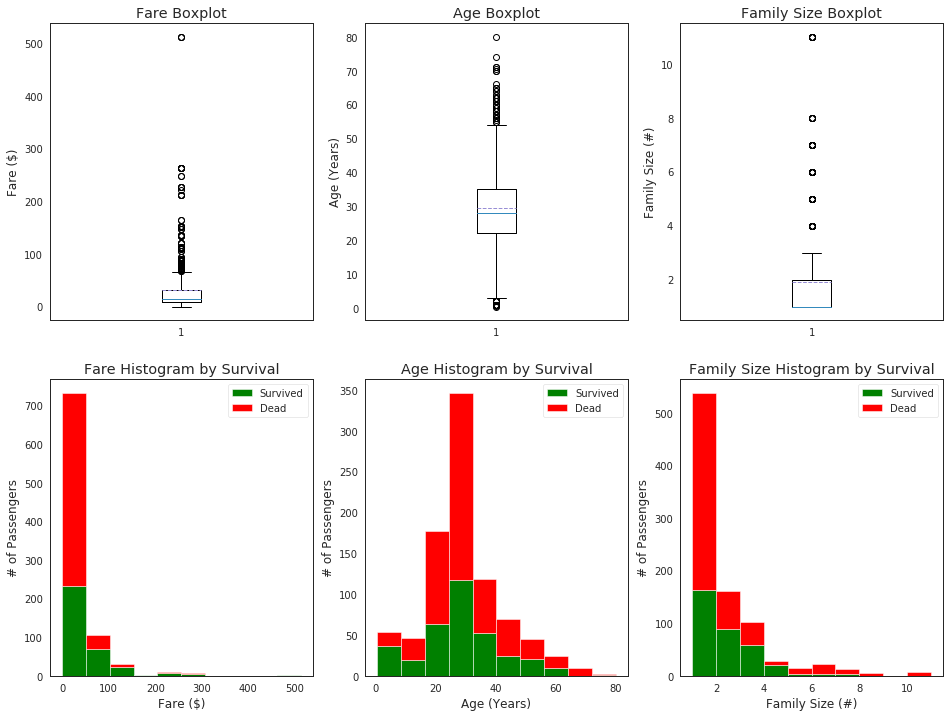

In [14]:
#주의: 학습 목적을 위해 일부로 다양한 방법을 사용하였습니다. 
#     다시말해 굳이 이 모든 것을 반드시 해야할 필요는 없습니다.

#graph distribution of quantitative(=Numerical) data
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(data_train['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data_train['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data_train['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data_train[data_train['Survived']==1]['Fare'], data_train[data_train['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data_train[data_train['Survived']==1]['Age'], data_train[data_train['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data_train[data_train['Survived']==1]['FamilySize'], data_train[data_train['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

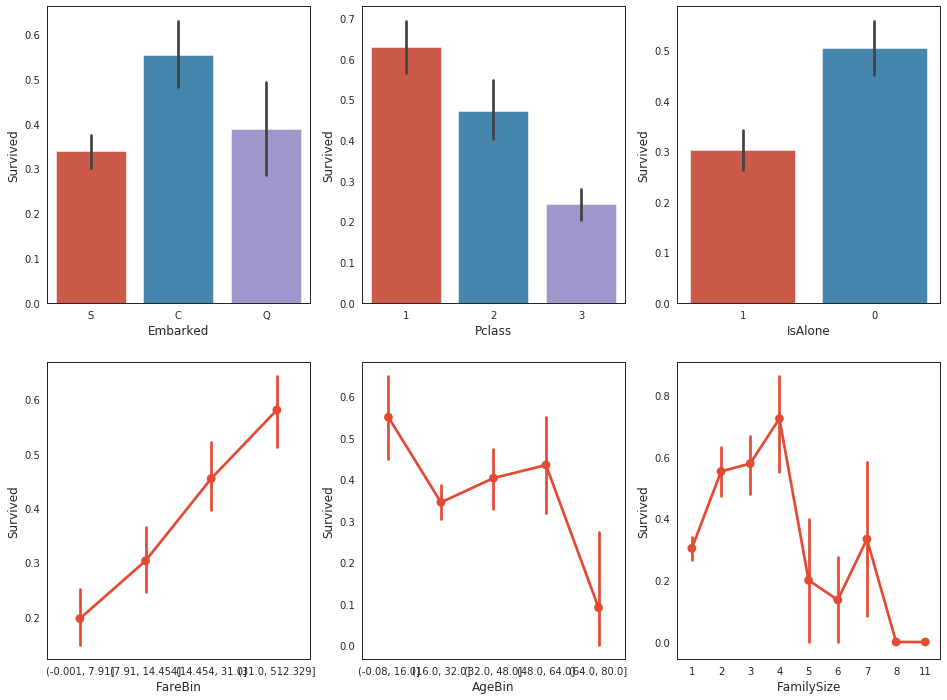

In [15]:
#graph distribution of categorical data
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=data_train, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data_train, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data_train, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=data_train, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data_train, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data_train, ax = saxis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

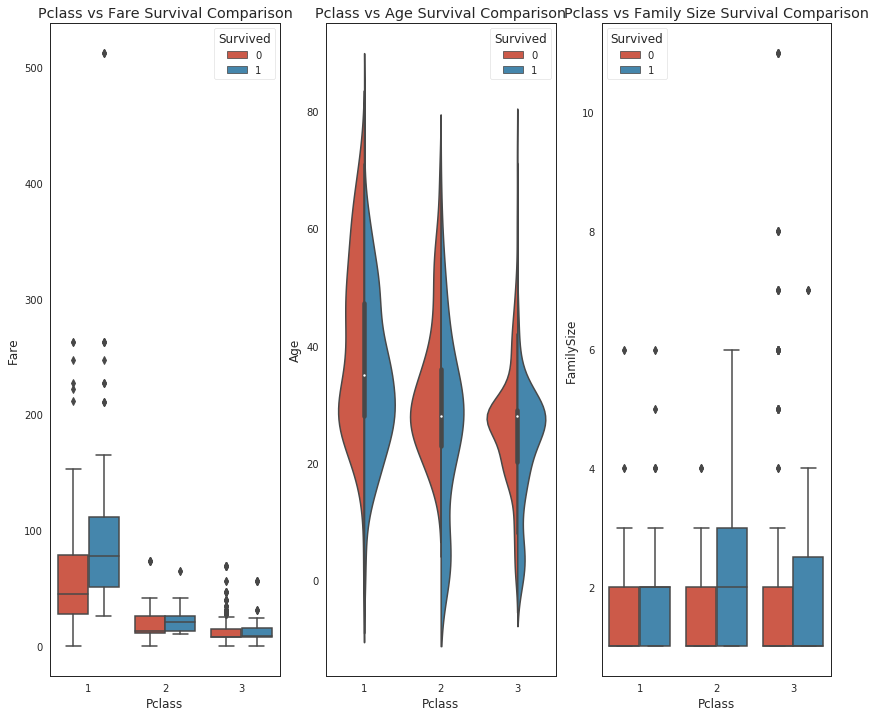

In [16]:
#graph distribution of qualitative(=categorical) data: Pclass
#we know class mattered in survival, now let's compare class and a 2nd feature
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data_train, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data_train, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data_train, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1, 'Sex vs IsAlone Survival Comparison')

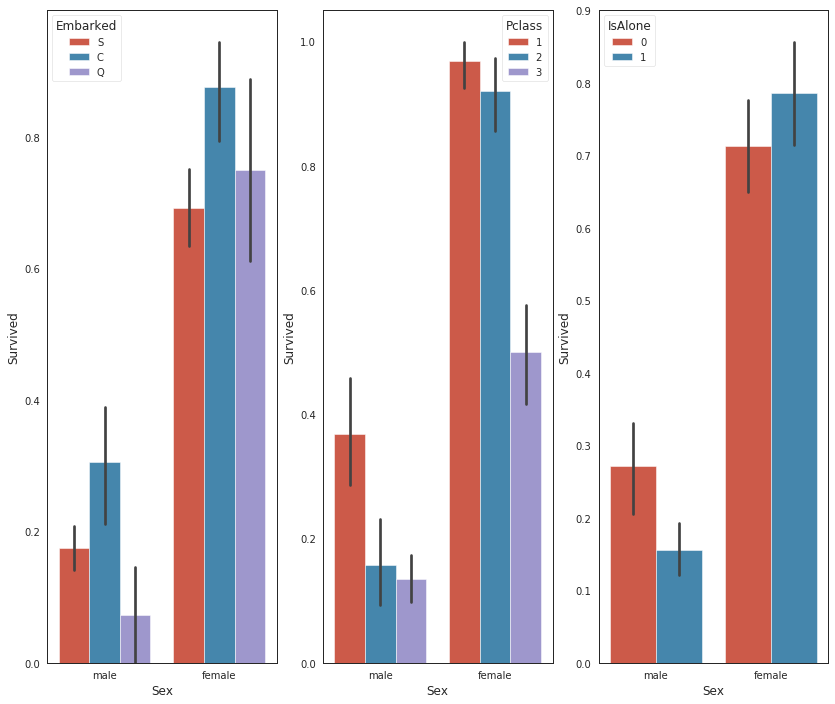

In [17]:
#graph distribution of qualitative(=categorical) data: Sex
#we know sex mattered in survival, now let's compare sex and a 2nd feature
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data_train, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data_train, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data_train, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

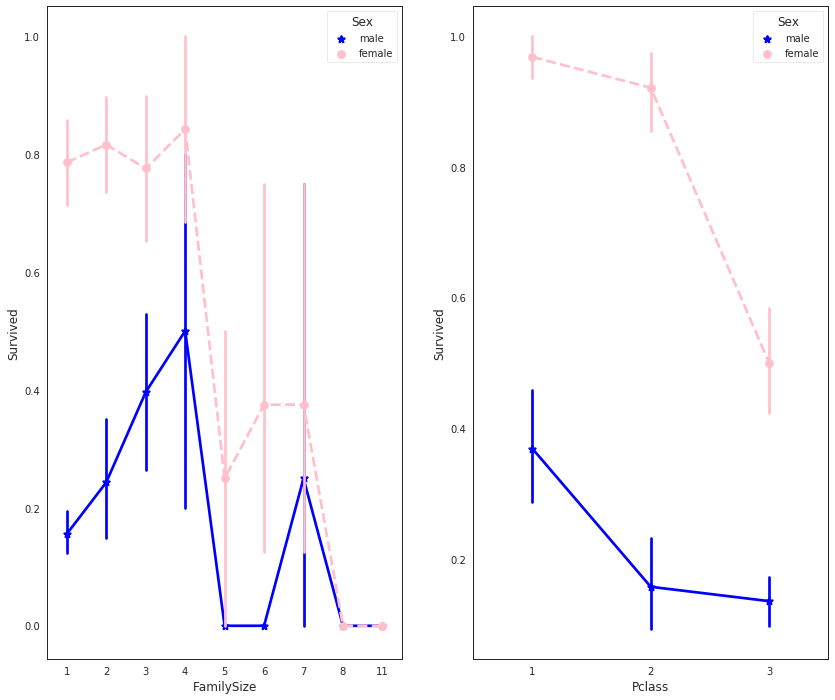

In [18]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
#hue: categorical variable name for palette
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data_train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

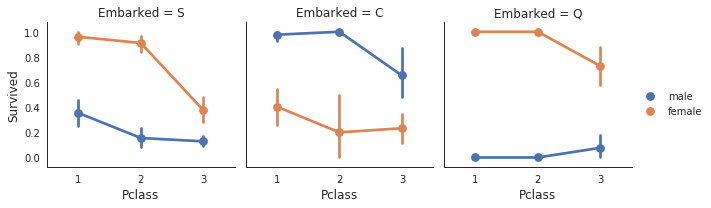

In [19]:
#how does embark port factor with class, sex, and survival compare
e = sns.FacetGrid(data_train, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

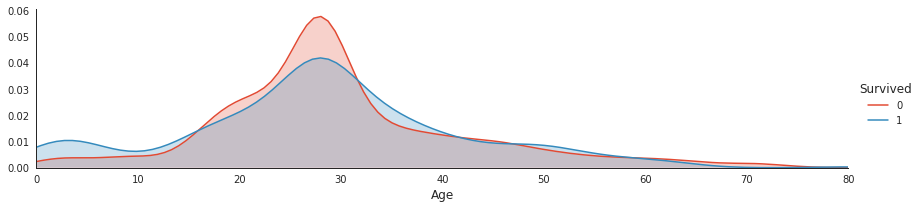

In [20]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( data_train, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data_train['Age'].max()))
a.add_legend()

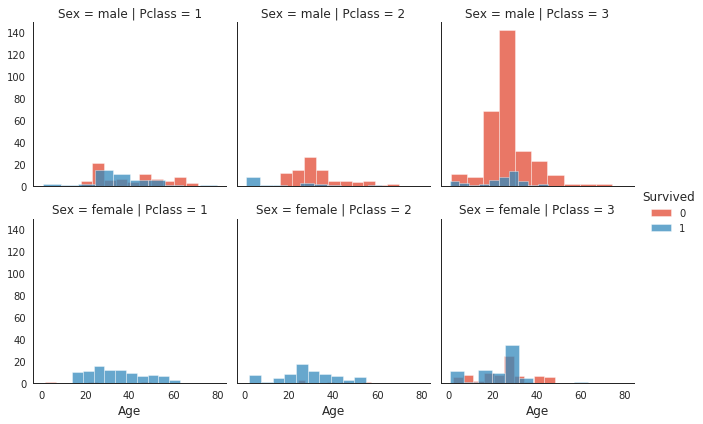

In [21]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(data_train, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

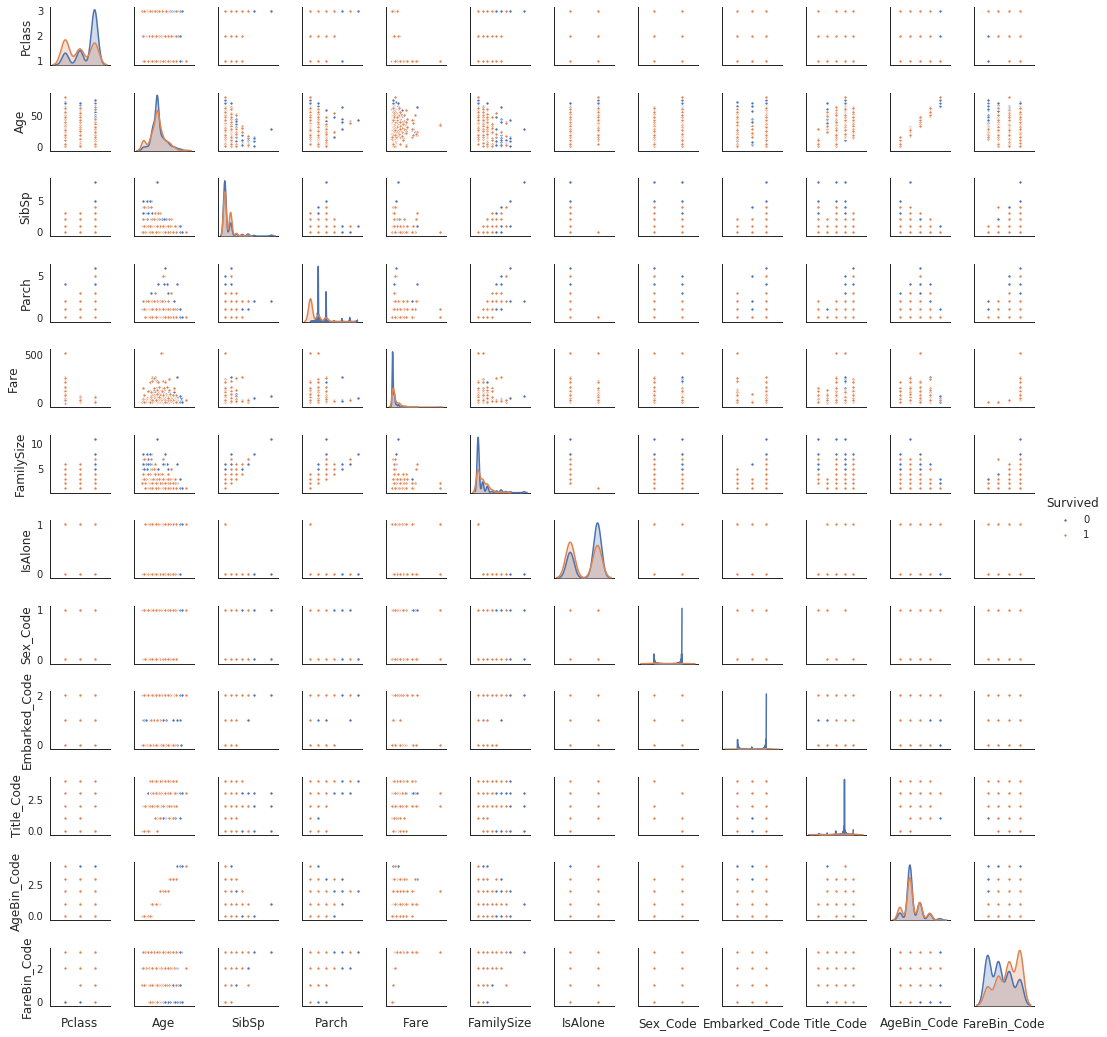

In [22]:
#pair plots of entire dataset
pp = sns.pairplot(data_train, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

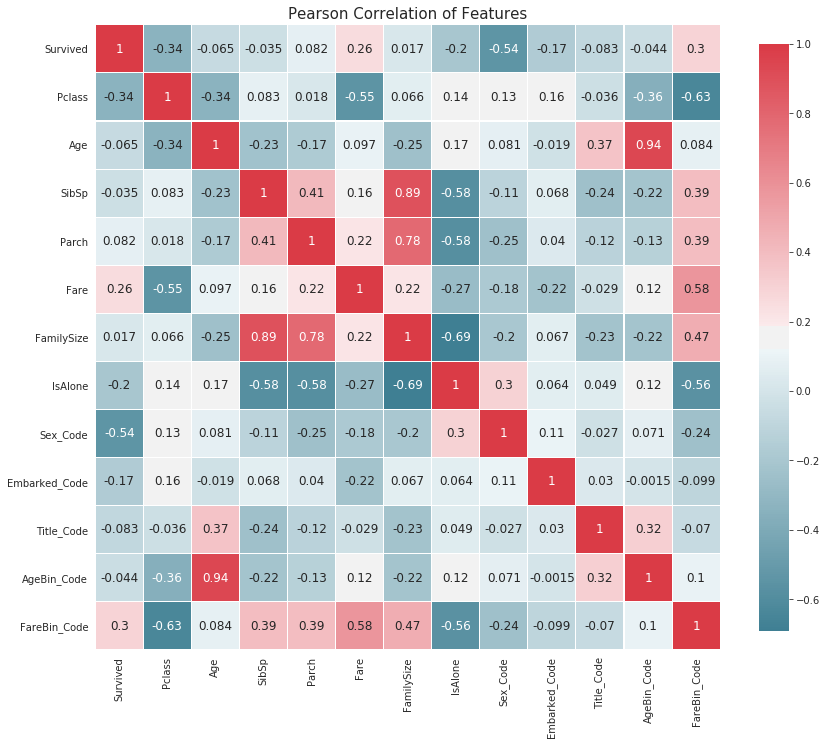

In [23]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data_train)

# __Chpater 8. Step 5: 데이터 모델링__